<a href="https://colab.research.google.com/github/Rsrirajan/Richter-s-Predictor-Modeling-Earthquake-Damage/blob/main/Ramanan_and_Devashish_Datathon_LISH_(Track_von_Neumann).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## &#9940; Confirm Rule Compliance

**I confirm that I followed all of the stated rules of the competition, including the constraint on AI tools.**

Please type your full name(s) below to indicate your agreement with the above statement.

<u>Participant #1</u>: Ramanan Srirajan

<u>Participant #2</u> (*if applicable*): Devashish Khatavkar

# **Data Challenge Overview -- Richter's Predictor: Modeling Earthquake Damage**

The impact of an earthquake is profound and far-reaching, displacing communities and destroying the infrastructure their lives depend on. A smart understanding of a building’s ability to withstand earthquakes can focus efforts to improve building infrastructure and mitigate the damage caused by future earthquakes. In this competition, you will solve a binary classification focused on predicting the level of damage to buildings caused by the 2015 Gorkha earthquake in Nepal, based on aspects of building location and construction.

We will evaluate prediction quality according to a [Log-Loss Error Function](https://www.kaggle.com/dansbecker/what-is-log-loss). (Note that this is different than Percent Accuracy!) As you know, a good statistical model is paramount for helping organizations allocate maintenance resources effectively. We’ve sourced this problem from our friends at [DrivenData](https://www.drivendata.org/), who are some awesome alumni of Harvard Business School and the School of Engineering and Applied Sciences.

## **Data Dictionary**

---



**Target Feature**:
+ `damage_grade`: level of damage to the building that was hit by the earthquake. There are 2 grades of the damage:

  + `0` represents low damage
  + `1` represents moderate to high damage

**Predictors**: <br>
* `geo_level_1_id, geo_level_2_id, geo_level_3_id_group` : geographic region in which building exists, from largest (level 1) to most specific sub-region (level 3).
* `count_floors_pre_eq`: number of floors in the building before the earthquake.
* `age`: age of the building in years
* `area_percentage`: normalized area of the building footprint.
* `height_percentage`: normalized height of the building.
footprint.
* `land_surface_condition`: surface condition of the land where the building was built.
* `foundation_type`: type of foundation used while building.
* `roof_type`: type of roof used while building.
* `ground_floor_type`: type of the ground floor.
* `other_floor_type`: type of constructions used above the ground floor.
* `position`: position of the building
* `plan_configuration`: building plan configuration.
* `has_superstructure_adobe_mud`: flag variable that indicates if the superstructure was made of Adobe/Mud.
* `has_superstructure_mud_mortar_stone`: flag variable that indicates if the superstructure was made of Mud Mortar - Stone.
* `has_superstructure_stone_flag`: flag variable that indicates if the superstructure was made of Stone.
* `has_superstructure_cement_mortar_stone`: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_mud_mortar_brick`: flag variable that indicates if the superstructure was made of Mud Mortar - Brick.
* `has_superstructure_cement_mortar_brick`: flag variable that indicates if the superstructure was made of Cement Mortar - Brick.
* `has_superstructure_timber`: flag variable that indicates if the superstructure was made of Timber.
* `has_superstructure_bamboo`: flag variable that indicates if the superstructure was made of Bamboo.
* `has_superstructure_rc_non_engineered`: flag variable that indicates if the superstructure was made of non-engineered reinforced concrete.
* `has_superstructure_rc_engineered`: flag variable that indicates if the superstructure was made of engineered reinforced concrete.
* `has_superstructure_other`: flag variable that indicates if the superstructure was made of any other material.
* `legal_ownership_status`: legal ownership status of the land where the building was built.
* `count_families`: number of families that live in the building.
* `has_secondary_use`: flag variable that indicates if the building was used for any secondary purpose.
* `has_secondary_use_agriculture`: flag variable that indicates if the building was used for agricultural purposes.
* `has_secondary_use_hotel`: flag variable that indicates if the building was used as a hotel.
* `has_secondary_use_rental`: flag variable that indicates if the building was used for rental purposes.
* `has_secondary_use_institution`: flag variable that indicates if the building was used as a location of any institution.
* `has_secondary_use_school`: flag variable that indicates if the building was used as a school.
* `has_secondary_use_industry`: flag variable that indicates if the building was used for industrial purposes.
* `has_secondary_use_health_post`: flag variable that indicates if the building was used as a health post.
* `has_secondary_use_gov_office`: flag variable that indicates if the building was used fas a government office.
* `has_secondary_use_use_police`: flag variable that indicates if the building was used as a police station.
* `has_secondary_use_other`: flag variable that indicates if the building was secondarily used for other purposes.

# **Your Contest Code**

## **Load Data**

Run the cell below to download and read in the training data.

In [ ]:
# Do not modify this
%autosave 60
import gdown
import pandas as pd

# Download the training data from drive
trainURL = "https://drive.google.com/uc?id=1PT2rvIbVivi--VnpsiCvonZwquWKbPXX"
gdown.download(trainURL, "train.csv", quiet=True)

# Read in the training data to a pandas dataframe called train
train = pd.read_csv("train.csv")
train.head(10)

Autosaving every 60 seconds


,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,319954,10,151,7723,4,5,19,12,t,i,...,1,0,0,0,0,0,0,0,0,0
1,109339,10,1407,9774,3,30,5,5,t,r,...,0,0,0,0,0,0,0,0,0,1
2,326182,21,581,2565,3,10,6,7,t,r,...,0,0,0,0,0,0,0,0,0,1
3,309380,6,1277,7577,3,30,7,7,t,r,...,0,0,0,0,0,0,0,0,0,1
4,116482,8,1114,8002,2,0,5,5,t,r,...,0,0,0,0,0,0,0,0,0,1
5,333636,13,128,10740,2,5,11,5,t,r,...,0,0,0,0,0,0,0,0,0,0
6,180001,7,225,12557,2,20,9,6,t,r,...,0,0,0,0,0,1,0,0,0,1
7,265205,25,779,7083,1,20,5,3,t,r,...,0,0,0,0,0,0,0,0,0,0
8,215549,3,175,4856,4,135,19,8,t,r,...,0,0,0,0,0,0,0,0,0,0
9,266411,8,912,6647,3,50,11,7,t,r,...,0,0,0,0,0,0,0,0,0,0


## **Load Packages**

You are free to use external packages to aid in your analyses. Note that many data science packages are already installed in the Colab environment. You may also install additional packages if necessary ([instructions](https://www.kindacode.com/snippet/how-to-install-python-libraries-in-google-colab/)).

In [ ]:
pip install catboost

In [ ]:
# Load packages here;
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_validate,KFold, RandomizedSearchCV
import scipy.stats as stats
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import log_loss
import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier
import random
from sklearn.tree import DecisionTreeClassifier

import lightgbm as lgb

import keras
from keras.layers import *
from keras.optimizers import *
from keras.models import Model

from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

## **Your Work**

Use this section to develop your predictive models. You may create additional code cells, and are encouraged to add text cells that explain the steps of your analysis. When you are satisfied with your model, follow the steps in the **Submit to Competition** section to make a submission to our competition on Kaggle.

+ As much as possible, try to group your analyses according to the subheaders within this section. For example, if you choose to do any feature engineering, do it within the *Feature Engineering* section below.

### Exploratory Data Analysis (EDA)

In [ ]:
# Add code here to explore the data.
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [ ]:
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,...,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000,208480.000000
mean,230315.056509,13.900979,701.049477,6260.862869,2.129729,26.633490,8.022794,5.434459,0.088757,0.761852,...,0.033413,0.008010,0.000950,0.000341,0.001103,0.000182,0.000153,0.000091,0.005017,0.334210
std,75224.174815,8.041721,412.708954,3646.147665,0.727376,74.119612,4.399647,1.914803,0.284393,0.425951,...,0.179714,0.089142,0.030803,0.018451,0.033197,0.013500,0.012388,0.009546,0.070655,0.471715
min,100001.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,165207.750000,7.000000,349.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,230412.500000,12.000000,703.000000,6280.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,295377.500000,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,360601.000000,30.000000,1427.000000,12567.000000,9.000000,995.000000,96.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208480 entries, 0 to 208479
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             208480 non-null  int64 
 1   geo_level_1_id                          208480 non-null  int64 
 2   geo_level_2_id                          208480 non-null  int64 
 3   geo_level_3_id                          208480 non-null  int64 
 4   count_floors_pre_eq                     208480 non-null  int64 
 5   age                                     208480 non-null  int64 
 6   area_percentage                         208480 non-null  int64 
 7   height_percentage                       208480 non-null  int64 
 8   land_surface_condition                  208480 non-null  object
 9   foundation_type                         208480 non-null  object
 10  roof_type                               208480 non-null 

In [ ]:
train[train.damage_grade == 1].count()

building_id                               69676
geo_level_1_id                            69676
geo_level_2_id                            69676
geo_level_3_id                            69676
count_floors_pre_eq                       69676
age                                       69676
area_percentage                           69676
height_percentage                         69676
land_surface_condition                    69676
foundation_type                           69676
roof_type                                 69676
ground_floor_type                         69676
other_floor_type                          69676
position                                  69676
plan_configuration                        69676
has_superstructure_adobe_mud              69676
has_superstructure_mud_mortar_stone       69676
has_superstructure_stone_flag             69676
has_superstructure_cement_mortar_stone    69676
has_superstructure_mud_mortar_brick       69676
has_superstructure_cement_mortar_brick  

In [ ]:
correlations = train.corrwith(train['damage_grade'])
sorted_abs_correlations = correlations.abs().sort_values(ascending=False)
sorted_abs_correlations

<ipython-input-8-48d0037a329c>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corrwith(train['damage_grade'])


damage_grade                              1.000000
has_superstructure_mud_mortar_stone       0.179120
has_superstructure_cement_mortar_brick    0.168319
has_superstructure_rc_non_engineered      0.093401
has_superstructure_rc_engineered          0.084553
area_percentage                           0.081945
count_floors_pre_eq                       0.077000
has_superstructure_timber                 0.067068
has_secondary_use                         0.066352
has_secondary_use_hotel                   0.065132
has_superstructure_bamboo                 0.060710
has_superstructure_cement_mortar_stone    0.056283
has_superstructure_stone_flag             0.055406
has_secondary_use_rental                  0.046670
count_families                            0.040679
geo_level_2_id                            0.032497
height_percentage                         0.031245
has_superstructure_adobe_mud              0.023305
has_superstructure_other                  0.022031
has_secondary_use_other        

In [ ]:
numeric_columns = train.select_dtypes(include=['int64', 'float64'])

t_statistics = []
p_values = []

for column in numeric_columns.columns:
    t_statistic, p_value = stats.ttest_ind(
        train[train['damage_grade'] == 0][column],
        train[train['damage_grade'] == 1][column]
    )
    t_statistics.append(t_statistic)
    p_values.append(p_value)

t_statistic_df = pd.DataFrame({'Variable': numeric_columns.columns, 't_statistic': t_statistics, 'p-value': p_values})

t_statistic_df['abs_t_statistic'] = abs(t_statistic_df['t_statistic'])
t_statistic_df = t_statistic_df.sort_values(by='abs_t_statistic', ascending=False)

t_statistic_df

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Variable,t_statistic,p-value,abs_t_statistic
31,damage_grade,-inf,0.000000e+00,inf
9,has_superstructure_mud_mortar_stone,-83.129441,0.000000e+00,83.129441
13,has_superstructure_cement_mortar_brick,77.965684,0.000000e+00,77.965684
16,has_superstructure_rc_non_engineered,42.833751,0.000000e+00,42.833751
17,has_superstructure_rc_engineered,38.745153,0.000000e+00,38.745153
6,area_percentage,37.541643,2.072672e-307,37.541643
4,count_floors_pre_eq,-35.262423,1.407235e-271,35.262423
14,has_superstructure_timber,30.691925,2.112147e-206,30.691925
20,has_secondary_use,30.362640,4.737452e-202,30.362640
22,has_secondary_use_hotel,29.801977,9.479015e-195,29.801977


In [ ]:
train[train.damage_grade == 0].count()

building_id                               138804
geo_level_1_id                            138804
geo_level_2_id                            138804
geo_level_3_id                            138804
count_floors_pre_eq                       138804
age                                       138804
area_percentage                           138804
height_percentage                         138804
land_surface_condition                    138804
foundation_type                           138804
roof_type                                 138804
ground_floor_type                         138804
other_floor_type                          138804
position                                  138804
plan_configuration                        138804
has_superstructure_adobe_mud              138804
has_superstructure_mud_mortar_stone       138804
has_superstructure_stone_flag             138804
has_superstructure_cement_mortar_stone    138804
has_superstructure_mud_mortar_brick       138804
has_superstructure_c

### Feature Engineering

### Model Building

In [ ]:
# Add code here to build your predictive models


### Model Evaluation

In [ ]:
# Add code here to evalute your models.

## **Submit to Competition**

Run the cell below to read in the test set features.

Then, you can use your model to generate predictions on this data, then create a dataframe with the following format / variables:
+ `id` - the unique ID for each observation.
+ `predicted` - your model's predicted probability that a building has moderate/high damage.

The data frame should look like the following:

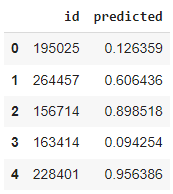

&#9940; Make sure the `predicted` column contains the *probability* prediction from your model and not a binary (0/1) prediction. Additionally, be aware that you are limited to 100 Kaggle submissions per day.

Write this data frame to a csv file called `"submission.csv"`. Then download this file by opening the files pane within Colab (look for the &#128193; symbol on the left of the screen). This is shown in the gif below.

After downloading the file, make a submission to our [Kaggle competition](https://www.kaggle.com/t/fdfd0bf3248241d9a199835295d4c39c). If you haven't already, you'll need to first sign in on Kaggle and hit "**Join the Competition**" in order to submit.

In [ ]:
# Download file with features in the test set
testFeaturesURL = "https://drive.google.com/uc?id=1m_VzX9dMs18w_Fiwk4Iy30T3724S8Wcg"
gdown.download(testFeaturesURL, "test.csv", quiet=True)

# Read test set features into a pandas data frame
testFeatures = pd.read_csv("test.csv")

testFeatures.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,114565,4,529,4583,2,40,7,5,t,u,...,0,0,0,0,0,0,0,0,0,0
1,132642,22,170,286,2,30,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
2,333379,20,1402,3794,2,40,9,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,137682,8,396,4772,3,20,5,7,o,r,...,0,0,0,0,0,0,0,0,0,0
4,246829,20,190,3473,2,5,7,6,t,w,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
geo1 = np.array(pd.get_dummies(pd.concat([train["geo_level_1_id"], testFeatures["geo_level_1_id"]])))
geo2 = np.array(pd.get_dummies(pd.concat([train["geo_level_2_id"], testFeatures["geo_level_2_id"]])))
geo3 = np.array(pd.get_dummies(pd.concat([train["geo_level_3_id"], testFeatures["geo_level_3_id"]])))

In [ ]:
def geo_model():
    input = Input((geo3.shape[1],))
    i = Dense(16, name="intermediate")(input)
    x_second = Dense(geo2.shape[1], activation='sigmoid')(i)
    x_first = Dense(geo1.shape[1], activation='sigmoid')(i)

    model = Model(input, [x_second, x_first])
    model.compile(loss="binary_crossentropy", optimizer="adam")
    return model

In [ ]:
model = geo_model()
model.fit(geo3, [geo2, geo1], batch_size=128, epochs=10, verbose=2)
model.save("weights.h5")

Epoch 1/10
2036/2036 - 27s - loss: 0.2357 - dense_loss: 0.0691 - dense_1_loss: 0.1666 - 27s/epoch - 13ms/step
Epoch 2/10
2036/2036 - 26s - loss: 0.0874 - dense_loss: 0.0056 - dense_1_loss: 0.0818 - 26s/epoch - 13ms/step
Epoch 3/10
2036/2036 - 27s - loss: 0.0295 - dense_loss: 0.0048 - dense_1_loss: 0.0247 - 27s/epoch - 13ms/step
Epoch 4/10
2036/2036 - 27s - loss: 0.0123 - dense_loss: 0.0040 - dense_1_loss: 0.0082 - 27s/epoch - 13ms/step
Epoch 5/10
2036/2036 - 28s - loss: 0.0070 - dense_loss: 0.0035 - dense_1_loss: 0.0035 - 28s/epoch - 14ms/step
Epoch 6/10
2036/2036 - 27s - loss: 0.0049 - dense_loss: 0.0032 - dense_1_loss: 0.0017 - 27s/epoch - 13ms/step
Epoch 7/10
2036/2036 - 26s - loss: 0.0037 - dense_loss: 0.0028 - dense_1_loss: 8.9738e-04 - 26s/epoch - 13ms/step
Epoch 8/10
2036/2036 - 27s - loss: 0.0028 - dense_loss: 0.0023 - dense_1_loss: 4.9646e-04 - 27s/epoch - 13ms/step
Epoch 9/10
2036/2036 - 27s - loss: 0.0020 - dense_loss: 0.0017 - dense_1_loss: 2.7881e-04 - 27s/epoch - 13ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Load GEO-Embed Model
model = geo_model()
model.load_weights("weights.h5")

In [ ]:
from keras import backend as K

get_int_layer_output = K.function([model.layers[0].input],
                                  [model.layers[1].output])

In [ ]:
out = []
for dat in geo3[:260601]:
    input_data = np.array([dat])
    layer_output = get_int_layer_output([input_data])[0]
    out.append(layer_output)

out = np.array(out)
out = np.squeeze(out)
combined_data = pd.concat([train, testFeatures])
combined_data = combined_data.drop(['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'], axis=1)
combined_data = combined_data.assign(geo_feat1=out[:,0],
                               geo_feat2=out[:,1],
                               geo_feat3=out[:,2],
                               geo_feat4=out[:,3],
                               geo_feat5=out[:,4],
                               geo_feat6=out[:,5],
                               geo_feat7=out[:,6],
                               geo_feat8=out[:,7],
                               geo_feat9=out[:,8],
                               geo_feat10=out[:,9],
                               geo_feat11=out[:,10],
                               geo_feat12=out[:,11],
                               geo_feat13=out[:,12],
                               geo_feat14=out[:,13],
                               geo_feat15=out[:,14],
                               geo_feat16=out[:,15])

train = combined_data.iloc[:len(train)]
testFeatures = combined_data.iloc[len(train):]

from sklearn.preprocessing import MinMaxScaler

train = pd.get_dummies(train, columns=['land_surface_condition', 'foundation_type', 'roof_type', "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"])

train['age'] = np.log(train['age'])
train['age'].replace(-np.inf, 0, inplace=True)

train['volume'] = train['area_percentage'] * train['height_percentage']

train['area_percentage'] = np.log(train['area_percentage'])

superstructure_columns = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']
train['total_superstructures'] = train[superstructure_columns].sum(axis=1)

testFeatures = pd.get_dummies(testFeatures, columns=['land_surface_condition', 'foundation_type', 'roof_type', "ground_floor_type", "other_floor_type", "position", "plan_configuration", "legal_ownership_status"])

testFeatures['age'] = np.log(testFeatures['age'])
testFeatures['age'].replace(-np.inf, 0, inplace=True)

testFeatures['volume'] = testFeatures['area_percentage'] * testFeatures['height_percentage']

testFeatures['area_percentage'] = np.log(testFeatures['area_percentage'])

superstructure_columns = ['has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other']
testFeatures['total_superstructures'] = testFeatures[superstructure_columns].sum(axis=1)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
train = pd.read_csv("/content/new_train.csv")
testFeatures = pd.read_csv("/content/new_test.csv")

In [ ]:
train.head(n=10)

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,...,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volume,total_superstructures
0,319954,4,1.609438,2.944439,12,0,0,0,0,0,...,0,0,0,0,0,0,1,0,228,1
1,109339,3,3.401197,1.609438,5,1,1,0,0,0,...,0,0,0,0,0,0,1,0,25,2
2,326182,3,2.302585,1.791759,7,0,1,0,0,0,...,0,0,0,0,0,0,1,0,42,1
3,309380,3,3.401197,1.945910,7,0,1,0,0,0,...,0,0,0,0,0,0,1,0,49,1
4,116482,2,0.000000,1.609438,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,25,1
5,333636,2,1.609438,2.397895,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,55,2
6,180001,2,2.995732,2.197225,6,0,1,0,0,0,...,0,0,0,0,0,0,1,0,54,1
7,265205,1,2.995732,1.609438,3,1,1,1,0,0,...,0,0,0,0,0,0,1,0,15,5
8,215549,4,4.905275,2.944439,8,1,0,0,0,1,...,0,0,0,0,0,0,1,0,152,2
9,266411,3,3.912023,2.397895,7,0,1,0,0,0,...,0,0,0,0,0,0,1,0,77,1


In [ ]:
testFeatures.head()

,building_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,...,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w,volume,total_superstructures
0,114565,2,3.688879,1.945910,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,35,1
1,132642,2,3.401197,1.609438,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,25,1
2,333379,2,3.688879,2.197225,5,0,1,0,0,0,...,0,0,0,0,0,0,1,0,45,2
3,137682,3,2.995732,1.609438,7,0,1,0,0,0,...,0,0,0,0,0,0,1,0,35,3
4,246829,2,1.609438,1.945910,6,0,1,0,0,0,...,0,0,0,0,0,0,1,0,42,3


In [ ]:
untrained_features = ["damage_grade", "has_secondary_use_gov_office", "has_secondary_use_use_police",
                      "has_secondary_use_health_post", "has_secondary_use_school",
                      "has_secondary_use_institution"] # , 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
                      # 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick',
                      # 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo',
                      # 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'age']
features = train.drop(untrained_features, axis=1).columns
X = train[features]
y = train['damage_grade']

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_final_test = scaler.transform(testFeatures[features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=200, min_samples_leaf=3, max_features='sqrt', criterion='entropy')),
    ('xgboost', xgb.XGBClassifier())
]

meta_model = LogisticRegression()

stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

stacking_model.fit(X_train, y_train)

stacking_preds = stacking_model.predict_proba(X_test)[:, 1]  # Probability of class 1

log_loss_ensemble = log_loss(y_test, stacking_preds)

print(f'Ensemble Accuracy: {log_loss_ensemble}')

Ensemble Accuracy: 0.4228832216227153


In [ ]:
# final_predictions_nn = model_nn.predict(X_final_test)[:, 0]

final_stacking_preds = stacking_model.predict_proba(X_final_test)[:, 1]  # Probability of class 1

submission = pd.DataFrame({'id': testFeatures.building_id, 'predicted': final_stacking_preds})
submission["predicted"] = np.clip(submission["predicted"], 0.05, 0.95)

submission.to_csv('submission.csv', index=False)

In [ ]:
# See below for an example of exporting a pandas data frame called "submission" to a csv file.

In [ ]:
#@title
from IPython.display import HTML

HTML("""
<div align="left">
<video width="70%" controls>
      <source src="https://i.imgur.com/GQy0Gm5.mp4" type="video/mp4">
</video></div>""")